In [1]:
# !pip install -U finance-datareader

In [9]:
import pandas as pd
import numpy as np

import FinanceDataReader as fdr
import datetime

from tqdm.notebook import tqdm

# K-stock code

In [10]:
# 한국 주식 코드 & 종목 확인
# symbol : 종목코드, Name : 종목명칭 
code_name = fdr.StockListing('KRX')[['Symbol','Name']]
code_name = code_name.sort_values('Symbol').reset_index(drop = True)  
code_name

,Symbol,Name
0,000020,동화약품
1,000040,KR모터스
2,000050,경방
3,000060,메리츠화재
4,000070,삼양홀딩스
...,...,...
2607,950160,코오롱티슈진
2608,950170,JTC
2609,950180,SNK
2610,950190,미투젠


In [11]:
def start_end(start='1997',end = None) :
    code_data = {}
    for num in tqdm(code_name.Symbol):
        try :
            code_data[num] = fdr.DataReader(num, start = start, end = end)
        except :
            continue

    return code_data    # key : 종목 code  / values : database

In [7]:
code_dict = start_end(start='1997')
code_dict

{'000020':              Open   High    Low  Close   Volume    Change
 Date                                                     
 2000-01-04   2663   3116   2663   3116   169430  0.149815
 2000-01-05   3172   3578   2946   3305   728760  0.060655
 2000-01-06   3304   3474   2813   2871   260640 -0.131316
 2000-01-07   2983   3294   2831   3296   453080  0.148032
 2000-01-10   3644   3700   3162   3211   752880 -0.025789
 ...           ...    ...    ...    ...      ...       ...
 2020-12-23  23500  24300  20450  20450  2745447 -0.144351
 2020-12-24  20300  20500  19500  20000  1222707 -0.022005
 2020-12-28  20000  20050  18600  18650  1215378 -0.067500
 2020-12-29  18750  19400  18750  19150   471430  0.026810
 2020-12-30  19100  19800  18800  19650   613696  0.026110
 
 [5173 rows x 6 columns],
 '000040':              Open   High    Low  Close   Volume    Change
 Date                                                     
 2000-01-04  33730  38549  33730  38545  1317700  0.142853
 2000-01

In [12]:
# Symbol(주식코드) error코드들 확인

s_list = []

for num in tqdm(code_name.Symbol):
    try :
        s_list.append(code_dict[num][['Open']].rename(columns={'Open':num}))
    except :
        print(num)   # 주식종목 x => ex) 코스피 등..

70101781
70101786
70101B95
70101B96
70101B99
70101B9A
70101BA2
70101BA7
70102786
70102B96
70102BA2
70103B96
70901B95
70902B95
70903B95
71201B97
71201B98
71202B98
71203B98
71204B98
71205B98
71206B98
71207B98
71208B98
71301A1B
71901B92
71901B96
71901B9B
71902B92
71902B96
71902B9B
71903B92
71903B96
72501773
72501BA2
72502773
72502BA2
72504A3B
73501BA2
73502BA2
73503BA2
74201767
74201773
7420177B
74201B98
74202767
7420277B
74202B98
74203B98
74204B98
74401722
74401769
74401773
74401777
74401BAA
74601669
74701772
74701776
74701789
74701B8A
74701B8B
74701B96
74701B97
74701B98
74701B9A
74702772
74702776
74702786
74702B8A
74702B96
74702B98
74703B96
74704B96
75601782
75601BA2
75602782
75602BA2
75701B93
75701BA7
75702B93
75702BA7



##### 2010기준으로  'Open', 'High', 'Low', 'Close', 'Volume', 'Change' 만들기
    dict
        key :  'Open', 'High', 'Low', 'Close', 'Volume', 'Change'
        values : datatable

In [13]:
select_col = {}
for c in ['Open', 'High', 'Low', 'Close', 'Volume', 'Change']:
    s_list = []
    error_list = []
    for num in tqdm(code_name.Symbol):
        try : 
            s_list.append(code_dict[num][[c]].rename(columns={c:num}))
        except :
            continue
    select_col[c] = pd.concat(s_list,axis=1)

In [14]:
select_col['Close']

,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,900310,900340,950110,950130,950140,950160,950170,950180,950190,950200
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3116.0,38545.0,1694.0,878.0,12217.0,8872.0,NaN,NaN,3224.0,1887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3305.0,44052.0,1651.0,1009.0,12217.0,9014.0,NaN,NaN,3164.0,1882.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,2871.0,46805.0,1723.0,977.0,12117.0,8602.0,NaN,NaN,2956.0,1840.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3296.0,41987.0,1644.0,982.0,12718.0,9526.0,NaN,NaN,3095.0,1942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,3211.0,45428.0,1622.0,1128.0,13619.0,9468.0,NaN,NaN,3118.0,1983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,20450.0,1115.0,12000.0,16200.0,74500.0,50100.0,31450.0,20850.0,70142.0,66883.0,...,1945.0,1370.0,8020.0,21450.0,4895.0,8010.0,5500.0,18650.0,27500.0,18200.0
2020-12-24,20000.0,1085.0,12050.0,16450.0,74900.0,49950.0,31650.0,20850.0,70334.0,67360.0,...,1960.0,1385.0,7930.0,21700.0,5000.0,8010.0,5590.0,17950.0,27800.0,18050.0
2020-12-28,18650.0,1035.0,12100.0,16400.0,74700.0,50300.0,32250.0,20850.0,73300.0,68600.0,...,1885.0,1375.0,8030.0,19650.0,4910.0,8010.0,5360.0,20050.0,27600.0,17000.0


# 수정시작

### Relative_Momentum(상대모멘텀)

In [32]:
start_date = select_col['Close'].iloc[[0]].index
start_date. > '1991'

array([ True])

In [19]:
temp.iloc[:,0].notnull().sum()

748

In [23]:
start = '2000'
end = datetime.date.today()
duration = 365
standard = 'Close'
sort_num = 30

temp = select_col[standard].reindex(pd.date_range(start,end)).fillna(method='ffill').T

while temp.iloc[:,0].notnull().sum() == 0 :
    col = temp.columns[0]
    temp.drop(col, axis = 1, inplace = True)

sol_dict = {}
start_date = temp.iloc[:,[0]].columns
end_date = start_date + datetime.timedelta(days=duration)
end_date


DatetimeIndex(['2001-01-03'], dtype='datetime64[ns]', freq='D')

In [450]:
# 상대모멘텀 추천코드 구하는 함수

def Relative_Momentum(start = '2000', end =datetime.date.today(), duration = 365, standard = 'Close',\
                      sort_num = 30):
     '''start : 분석 시작시점 / end : 분석 종료시점, duration : 분석기간, standard : 시가, 종가..
     sort_num : 추천 종목갯수'''

    start_date = select_col['Close'].iloc[[0]].index

    if start < start_date :
        print('start_end 함수의 시작값을 조정해주세요.')
        pass

    else :
        temp = select_col[standard].reindex(pd.date_range(start,end)).fillna(method='ffill').T
        while temp.iloc[:,0].notnull().sum() == 0 :
            col = temp.iloc[:,[0]].columns
            temp.drop(col, axis = 1, inplace = True)

        sol_dict = {}
        start_date = temp.iloc[:,[0]].columns
        end_date = start_date + datetime.timedelta(days=duration)
        
        while end_date[0] in temp.columns:
            temp_series = pd.DataFrame((temp[end_date].iloc[:,0] - temp[start_date].iloc[:,0])\
                                       /temp[start_date].iloc[:,0]).dropna()[0].sort_values(ascending = False)
            
            sol_dict[str(start_date[0]).split(' ')[0]] = temp_series[temp_series!=np.inf][:sort_num]
            
            start_date = end_date
            end_date = start_date + datetime.timedelta(days=duration)

        else :
            end_date = temp.iloc[:,[-1]].columns
            
            temp_series = pd.DataFrame((temp[end_date].iloc[:,0] - temp[start_date].iloc[:,0])/\
                                       temp[start_date].iloc[:,0]).dropna()[0]\
            .sort_values(ascending = False)

            sol_dict[str(start_date[0]).split(' ')[0]] = temp_series[temp_series != np.inf][:sort_num]
            
        return sol_dict

In [394]:
Relative_Momentum(start = '2010')

{'2010-01-04': 030790    65.276744
 065420     7.372372
 065620     6.641975
 067000     4.700395
 081000     3.667662
 011780     3.551559
 048770     3.430052
 006345     3.385965
 011155     3.347826
 004415     2.985663
 011785     2.950437
 051370     2.915901
 041510     2.758213
 032685     2.645080
 009520     2.568671
 035150     2.558140
 013520     2.527228
 017800     2.515106
 010690     2.409962
 069460     2.396471
 051780     2.222222
 080000     2.210761
 008355     2.187388
 032750     2.186869
 082270     2.182927
 005850     2.056455
 049800     1.938567
 003670     1.889696
 032980     1.842594
 025770     1.808219
 Name: 0, dtype: float64,
 '2011-01-04': 053800    7.371728
 060310    6.237792
 014190    5.686391
 005190    5.217532
 036090    4.692161
 013990    4.448370
 040350    3.480653
 041830    3.317343
 078160    3.299914
 012170    3.200529
 058530    3.114855
 014100    3.114493
 012690    3.081633
 023910    2.630470
 019210    2.579545
 008600    2.535

# 추천코드 => 추천 종목으로 변경

In [22]:
code_tran = fdr.StockListing('KRX')[['Symbol','Name']]
code_tran.set_index('Symbol', inplace=True)
code_tran

,Name
Symbol,
060310,3S
095570,AJ네트웍스
006840,AK홀딩스
054620,APS홀딩스
265520,AP시스템
...,...
000547,흥국화재2우B
000545,흥국화재우
003280,흥아해운


In [342]:
code_tran.loc[['064090', '900100', '008930', '006060', '109960', '128940', '004105',
       '036200', '060240', '051980', '056000', '050320', '121800', '067080',
       '114570', '006345', '001525', '109070', '199800', '036630', '019660',
       '078130', '058450', '066790', '033250', '115530', '178600', '007390',
       '074610', '005110']]['Name'].values

array(['에프앤리퍼블릭', '뉴프라이드', '한미사이언스', '화승인더', '에이프로젠 H&G', '한미약품', '태양금속우',
       '유니셈', '룽투코리아', '센트럴바이오', '네스엠', '아래스', '비덴트', '대화제약', '지스마트글로벌',
       '대원전선우', '동양우', '컨버즈', '툴젠', '세종텔레콤', '글로본', '국일제지', '일야', '씨씨에스',
       '체시스', '씨엔플러스', '대동고려삼', '네이처셀', '이엔플러스', '한창'], dtype=object)

In [340]:
Relative_Momentum(start = '2000',duration=93)

{'2000-01-04': 012700    49.397939
 000440    21.675000
 017650    14.942029
 023790    12.304251
 024060    11.514970
 001000    10.919192
 006920     6.888696
 003310     4.967320
 009730     4.754964
 032860     4.466633
 024740     4.037534
 010170     3.854120
 009620     3.634389
 017890     3.518767
 006050     3.414266
 018700     3.409726
 024950     2.944816
 026910     2.905000
 007770     2.879988
 033920     2.664062
 031310     2.661359
 025870     2.573046
 006140     2.548280
 004720     2.462053
 006890     2.406114
 007700     2.347515
 010040     2.232202
 018310     2.154728
 033310     2.136703
 024840     2.034639
 Name: 0, dtype: float64,
 '2000-04-06': 036480    4.070682
 021040    2.163153
 002680    1.790119
 020400    1.545222
 018700    1.482749
 021820    1.426136
 004105    1.403794
 026940    1.219146
 024910    1.218053
 023410    1.203597
 006920    1.048060
 035150    0.928865
 010170    0.865107
 019540    0.841526
 036530    0.750000
 024110    0.746

In [338]:
def Relative_Momentum(start = '2010', end =datetime.date.today(), duration = 365, standard = 'Close'\
                     ,sort_num = 30):
    # 기본 : 시작가, 1년, 분석 : 분석일자까지  # print_code_num : 몇개의 코드추천할지

    temp = select_col[standard].reindex(pd.date_range(start,end)).fillna(method='ffill').T
    start_date = temp.iloc[:,[0]].columns
    
    
    if start < start_date :
        print('start_end 함수의 시작값을 조정해주세요.')
        pass

    else :
        while temp.iloc[:,0].notnull().sum() == 0 :
            col = temp.iloc[:,[0]].columns
            temp.drop(col, axis = 1, inplace = True)

        sol_dict = {}
        start_date = temp.iloc[:,[0]].columns
        end_date = start_date + datetime.timedelta(days=duration)
        
        while end_date[0] in temp.columns:
            temp_series = pd.DataFrame((temp[end_date].iloc[:,0] - temp[start_date].iloc[:,0])\
                                       /temp[start_date].iloc[:,0]).dropna()[0]\
            .sort_values(ascending = False)
            
            sol_dict[str(start_date[0]).split(' ')[0]] = temp_series[temp_series!=np.inf][:sort_num]
            
            start_date = end_date
            end_date = start_date + datetime.timedelta(days=duration)

        else :
            end_date = temp.iloc[:,[-1]].columns
            
            temp_series = pd.DataFrame((temp[end_date].iloc[:,0] - temp[start_date].iloc[:,0])/\
                                       temp[start_date].iloc[:,0]).dropna()[0]\
            .sort_values(ascending = False)

            sol_dict[str(start_date[0]).split(' ')[0]] = temp_series[temp_series != np.inf][:sort_num]
            
        return sol_dict

### 수익확인

In [8]:
# 수익확인
# 결과가 nan : 입력한 종목이 시작시점에 없을 경우 nan 출력

def Profit(stock_code, start = '2010', end =datetime.date.today(), standard = 'Open') :

    start_date = select_col['Close'].iloc[[0]].index
    
    if start < start_date :
        print('start_end 함수의 시작값을 조정해주세요.')
        pass
    
    else :
        temp = select_col[standard].reindex(pd.date_range(start,end)).fillna(method='ffill').T
        start_date = temp.iloc[:,[0]].columns

        while temp.iloc[:,0].notnull().sum() == 0 :
            col = temp.iloc[:,[0]].columns
            temp.drop(col, axis = 1, inplace = True)
        start_date = temp.columns[0]
        end_date = temp.columns[-1]
        start_price = temp[start_date][stock_code]
        end_price = temp[end_date][stock_code]
        get_rate = (end_price - start_price)/start_price
        return get_rate

In [406]:
Profit('225530', start = '2010-01', end = '2018-01-03')

nan

In [403]:
fdr.DataReader('225530', start = '1991')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-12-17,2043,2656,2037,2111,14131371,NaN
2015-12-18,2160,2167,1916,1937,2625789,-0.082425
2015-12-21,1892,1896,1670,1683,1440507,-0.131131
2015-12-22,1699,1736,1607,1645,741838,-0.022579
2015-12-23,1630,1663,1508,1577,622980,-0.041337
...,...,...,...,...,...,...
2020-12-22,5620,5650,5470,5550,104248,-0.010695
2020-12-23,5400,5720,5390,5630,100345,0.014414
2020-12-24,5620,5620,5510,5580,93888,-0.008881


### Momentum_Recomend

In [407]:
Relative_Momentum()

{'2010-01-04': 030790    65.276744
 065420     7.372372
 065620     6.641975
 067000     4.700395
 081000     3.667662
 011780     3.551559
 048770     3.430052
 006345     3.385965
 011155     3.347826
 004415     2.985663
 011785     2.950437
 051370     2.915901
 041510     2.758213
 032685     2.645080
 009520     2.568671
 035150     2.558140
 013520     2.527228
 017800     2.515106
 010690     2.409962
 069460     2.396471
 051780     2.222222
 080000     2.210761
 008355     2.187388
 032750     2.186869
 082270     2.182927
 005850     2.056455
 049800     1.938567
 003670     1.889696
 032980     1.842594
 025770     1.808219
 Name: 0, dtype: float64,
 '2011-01-04': 053800    7.371728
 060310    6.237792
 014190    5.686391
 005190    5.217532
 036090    4.692161
 013990    4.448370
 040350    3.480653
 041830    3.317343
 078160    3.299914
 012170    3.200529
 058530    3.114855
 014100    3.114493
 012690    3.081633
 023910    2.630470
 019210    2.579545
 008600    2.535

In [452]:
# MR_dict / key : 모멘텀 시작 기준일
def Monentum_recommed_code(sol_dict):
    MR_dict = {}
    for i in sol_dict:
        MR_dict[i] = sol_dict[i].index
    return MR_dict

In [453]:
mr_dict = Monentum_recommed_code(Relative_Momentum())

In [454]:
mr_dict['2010-01-04']

Index(['030790', '065420', '065620', '067000', '081000', '011780', '048770',
       '006345', '011155', '004415', '011785', '051370', '041510', '032685',
       '009520', '035150', '013520', '017800', '010690', '069460', '051780',
       '080000', '008355', '032750', '082270', '005850', '049800', '003670',
       '032980', '025770'],
      dtype='object')

In [455]:
Relative_Momentum()['2010-01-04'].index[1]

'065420'

##### 2011.1.4의 상대적 모멘텀 추천종목  수익확인

In [412]:
rate_dict={}
for c in mr_dict['2016-01-03']:
    rate_dict[c] = Profit(c, start = '2017-01-03', end = '2018-01-03')

In [413]:
rate_dict

{'109610': -0.6799755426475084,
 '225530': -0.46472881956752926,
 '065060': -0.7002412545235223,
 '014200': -0.511875,
 '049120': -0.6251342642320086,
 '014915': -0.756732223903177,
 '063760': 0.21929824561403508,
 '018700': -0.7077868852459016,
 '003520': 0.03428571428571429,
 '224060': -0.5767441860465117,
 '090470': -0.1623529411764706,
 '014910': -0.7772511848341233,
 '109740': -0.3619831664311605,
 '200230': 2.603707995365006,
 '058220': -0.38867469879518074,
 '084180': -0.5761472516389309,
 '002140': -0.6185133239831697,
 '155650': 1.7780025749494206,
 '136660': 3.334600760456274,
 '019570': -0.842247433819557,
 '147830': -0.16455696202531644,
 '060260': -0.6073962264150944,
 '090460': 2.0289017341040463,
 '089140': -0.4686907020872865,
 '118000': -0.654054054054054,
 '002900': -0.5515898767034393,
 '104040': -0.46398891966759004,
 '071280': -0.3646854448442735,
 '045660': -0.013513513513513514,
 '043290': -0.4052805280528053}

In [414]:
code_name[code_name.Symbol == '060310']

,Symbol,Name
1180,060310,3S


## 상대적 모멘텀 분기, 반기, 연간별 추천종목 및 수익률

##### 2010년도~ 분기별 추천종목 수익률
    투자기간 : 분기
    분기 : 93일로 가정

In [459]:
mr_dict = Monentum_recommed_code(Relative_Momentum(start = '2010', duration = 93, sort_num = 30))
mr_dict

{'2010-01-04': Index(['009620', '000590', '084680', '102280', '001140', '025770', '035460',
        '014470', '033310', '046390', '034810', '033430', '065420', '092070',
        '109960', '011300', '053270', '046310', '065450', '069460', '071090',
        '018470', '008800', '065620', '012860', '015710', '039420', '088390',
        '009780', '042370'],
       dtype='object'),
 '2010-04-07': Index(['011155', '009320', '004920', '065420', '047770', '011330', '081000',
        '017900', '004835', '092220', '069510', '004380', '068330', '011785',
        '043650', '048770', '041510', '064090', '020560', '083930', '080000',
        '089890', '032500', '090470', '011780', '082270', '067290', '060300',
        '099220', '011150'],
       dtype='object'),
 '2010-07-09': Index(['032685', '004415', '018500', '008355', '014915', '039670', '065770',
        '001550', '000545', '006345', '008800', '090710', '082270', '032980',
        '012030', '033110', '000725', '014470', '000325', '051780', '002

In [460]:
len(mr_dict)

44

In [461]:
datetime.datetime.now()

datetime.datetime(2020, 12, 29, 22, 36, 22, 501462)

In [462]:
end_date = str(datetime.datetime.strptime(list(mr_dict.keys())[0], "%Y-%m-%d")+datetime.timedelta(days=93)).split(' ')[0]
mr_dict

{'2010-01-04': Index(['009620', '000590', '084680', '102280', '001140', '025770', '035460',
        '014470', '033310', '046390', '034810', '033430', '065420', '092070',
        '109960', '011300', '053270', '046310', '065450', '069460', '071090',
        '018470', '008800', '065620', '012860', '015710', '039420', '088390',
        '009780', '042370'],
       dtype='object'),
 '2010-04-07': Index(['011155', '009320', '004920', '065420', '047770', '011330', '081000',
        '017900', '004835', '092220', '069510', '004380', '068330', '011785',
        '043650', '048770', '041510', '064090', '020560', '083930', '080000',
        '089890', '032500', '090470', '011780', '082270', '067290', '060300',
        '099220', '011150'],
       dtype='object'),
 '2010-07-09': Index(['032685', '004415', '018500', '008355', '014915', '039670', '065770',
        '001550', '000545', '006345', '008800', '090710', '082270', '032980',
        '012030', '033110', '000725', '014470', '000325', '051780', '002

In [353]:
# 투자시점별 수익률 
# rate : key = 투자시점, values = 해당수익률
rate = {}
for i in range(len(mr_dict)):
    rate_dict = {}
    temp_date = list(mr_dict.keys())[0]
    # duration = 93
    start_date = str(datetime.datetime.strptime(list(mr_dict.keys())[0], "%Y-%m-%d")+datetime.timedelta(days=93)).split(' ')[0]

    try : 
        for c in mr_dict[start_date]:
            rate_dict[c] = Profit(c, start = temp_date, end = end_date)
        rate[start_date] = sum(rate_dict.values())

    except IndexError :
        start_date = datetime.date.today()
        for c in mr_dict[start_date]:
            rate_dict[c] = Profit(c, start = temp_date, end = end_date)
        rate[start_date] = sum(rate_dict.values())

<ipython-input-346-86224d774e10>:20: RuntimeWarning: divide by zero encountered in double_scalars
  get_rate = (end_price - start_price)/start_price


In [353]:
# 투자시점별 수익률 
# rate : key = 투자시작시점, values = 해당수익률
rate = {}
for i in range(len(mr_dict)):
    rate_dict = {}
    temp_date = list(mr_dict.keys())[i]
    for c in mr_dict[temp_date]:
        try :
            rate_dict[c] = Profit(c, start = temp_date, end = list(mr_dict.keys())[i+1])
            
        except IndexError :
            pass
    if pd.isnull(sum(rate_dict.values())):
        suma = 0
        for r in rate_dict.values():
            if pd.isnull(r) :
                continue
            else :
                suma = suma + r
    else :
        suma = sum(rate_dict.values())
    rate[temp_date] = suma / 100

<ipython-input-346-86224d774e10>:20: RuntimeWarning: divide by zero encountered in double_scalars
  get_rate = (end_price - start_price)/start_price


<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47456 missing from curre

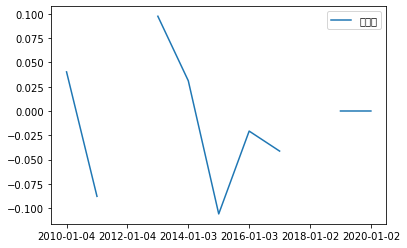

In [354]:
pd.DataFrame(rate, index = ['수익률']).T.plot()

In [183]:
fdr.DataReader('KS11', '2015')

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,1926.44,1914.24,1929.15,1909.67,2.587800e+08,0.0057
2015-01-05,1915.75,1921.96,1921.96,1903.37,3.134400e+08,-0.0055
2015-01-06,1882.45,1895.48,1900.02,1877.38,3.036900e+08,-0.0174
2015-01-07,1883.83,1878.90,1887.60,1876.27,2.805100e+08,0.0007
2015-01-08,1904.65,1895.85,1907.23,1891.77,2.622100e+08,0.0111
...,...,...,...,...,...,...
2020-12-22,2733.68,2772.03,2774.22,2733.64,1.260000e+09,-0.0162
2020-12-23,2759.82,2737.74,2769.08,2716.28,1.120000e+09,0.0096
2020-12-24,2806.86,2762.60,2812.16,2762.60,1.030000e+09,0.0170


# 시각화

In [38]:
# !pip install mpl_finance
# !pip install --upgrade mplfinance

In [33]:
import mplfinance
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [34]:
# 삼성전자 주가 변화확인
code_name[code_name.Name == '삼성전자']

,Symbol,Name
326,005930,삼성전자


In [35]:
df_ss = fdr.DataReader('109610', start = '2016.1.3',end = '2016.3.31')
df_ss

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,2060,2171,1969,2174,795655,0.301017
2016-01-05,2567,2756,2311,2545,4933810,0.170653
2016-01-06,2518,2593,2343,2396,2033095,-0.058546
2016-01-07,2630,2881,2350,2399,1805232,0.001252
2016-01-08,2260,2344,2138,2294,671540,-0.043768
2016-01-11,2229,2269,2121,2138,302726,-0.068003
2016-01-12,2101,2204,2039,2085,454559,-0.024790
2016-01-13,2109,2705,2103,2344,4023141,0.124221
2016-01-14,2518,3044,2492,2795,5096778,0.192406


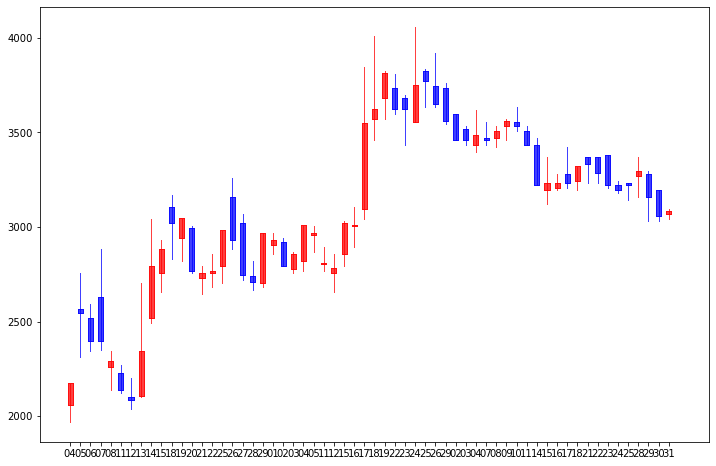

In [39]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, df_ss['Open'], df_ss['High'], df_ss['Low'], df_ss['Close'],\
                              width=0.5, colorup='r', colordown='b')

day_list = range(len(df_ss))
name_list = []
for day in df_ss.index:
    name_list.append(day.strftime('%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

plt.show()

### Momentum_Recomend

In [40]:
def Monentum_recommed_code(sol_dict):
    MR_dict = {}
    for i in sol_dict:
        MR_dict[i] = sol_dict[i].index
    return MR_dict

In [41]:
mr_dict = Monentum_recommed_code(Relative_Momentum(start = '2015-12',duration=93))

In [42]:
mr_dict['2015-12-01']

Index(['096690', '185190', '044480', '097800', '032790', '200230', '137940',
       '033180', '190510', '122690', '063760', '208890', '121850', '004770',
       '123840', '160600', '019570', '149010', '054620', '068790', '039200',
       '056000', '096630', '220180', '050110', '099320', '199800', '131400',
       '185490', '017180'],
      dtype='object')

# 산업종류

In [49]:
pd.read_csv('https://raw.githubusercontent.com/0looo/mmm_data/main/data/%EC%82%B0%EC%97%85%EB%B6%84%EB%A5%98.csv', index_col=0)

,시장구분,종목코드,종목명,산업분류,현재가(종가),전일대비,시가총액(원)
0,코스피,030720,동원수산,"농업, 임업 및 어업","9,260",90,"43,094,234,300"
1,코스피,007160,사조산업,"농업, 임업 및 어업","31,050",150,"155,250,000,000"
2,코스피,006040,동원산업,"농업, 임업 및 어업","219,000","3,500","805,403,379,000"
3,코스피,004970,신라교역,"농업, 임업 및 어업","9,420",20,"150,720,000,000"
4,코스피,003580,넥스트사이언스,광업,"5,320",10,"173,606,629,000"
...,...,...,...,...,...,...,...
2382,코스닥,054630,에이디칩스,기타제조,986,1,"51,240,700,416"
2383,코스닥,263920,블러썸엠앤씨,기타제조,"4,555",0,"62,509,048,460"
2384,코스닥,026040,제이에스티나,기타제조,"2,045",35,"33,750,250,550"
2385,코스닥,073190,듀오백,기타제조,"3,695",65,"44,221,907,800"
